In [1]:
import os


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px

# Map 2 libraries
import descartes
#import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
pos='/content/drive/MyDrive/covid/virufy_data/clinical/original/pos'
neg='/content/drive/MyDrive/covid/virufy_data/clinical/original/neg'

In [4]:
pos_mp3 = os.listdir(pos)

In [5]:
neg_mp3= os.listdir(neg)

In [ ]:
ipd.Audio(pos+'/'+pos_mp3[0])

In [ ]:
ipd.Audio(neg+'/'+neg_mp3[2])

In [ ]:
y, sr = librosa.load(pos+'/'+pos_mp3[0])

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', np.shape(y)[0]/sr)


y: [ 0.          0.          0.         ... -0.00213402 -0.00052569
  0.00054566] 

y shape: (442176,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 20.053333333333335


In [ ]:
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 6.0152975e-06 -5.3303775e-05 -1.4555434e-04 ... -2.1340156e-03
 -5.2569242e-04  5.4565648e-04] 

Audio File shape: (440128,)


In [6]:
pos_0, sr_pos0 = librosa.load(pos+'/'+pos_mp3[0])
audio_pos0, _ = librosa.effects.trim(pos_0)

pos_1, sr_pos1 = librosa.load(pos+'/'+pos_mp3[1])
audio_pos1, _ = librosa.effects.trim(pos_1)

neg_1, sr_neg1 = librosa.load(neg+'/'+neg_mp3[0])
audio_neg1, _ = librosa.effects.trim(neg_1)

neg_2, sr_neg2 = librosa.load(neg+'/'+neg_mp3[1])
audio_neg2, _ = librosa.effects.trim(neg_2)



In [7]:
covid_sample = ['pos_patient1', 'pos_patient2', 'neg_patient1', 'neg_patient2']

#1. Sound Waves🌊(2D Representation)




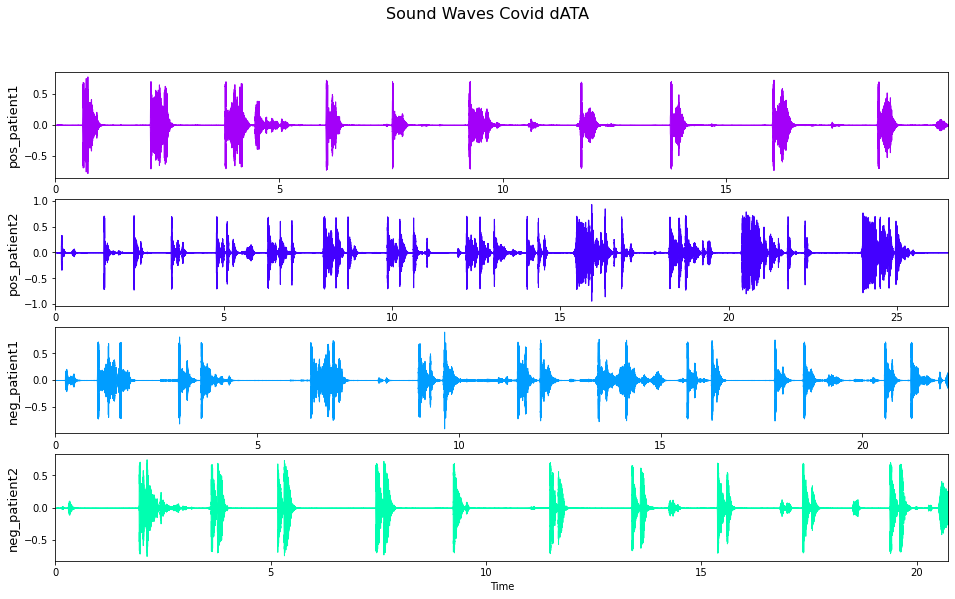

In [ ]:
fig, ax = plt.subplots(4, figsize = (16, 9))
fig.suptitle('Sound Waves Covid dATA', fontsize=16)

librosa.display.waveplot(y = audio_pos0, sr = sr_pos0, color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_pos1, sr = sr_pos1, color = "#4300FF", ax=ax[1])
librosa.display.waveplot(y = audio_neg1, sr = sr_neg1, color = "#009DFF", ax=ax[2])
librosa.display.waveplot(y = audio_neg2, sr = sr_neg2, color = "#00FFB0", ax=ax[3])
#librosa.display.waveplot(y = audio_vesspa, sr = sr_vesspa, color = "#D9FF00", ax=ax[4]);

for i, name in zip(range(4), covid_sample):
    ax[i].set_ylabel(name, fontsize=13)

##2. Fourier Transform 🥁¶






In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_pos0 = np.abs(librosa.stft(audio_pos0, n_fft = n_fft, hop_length = hop_length))
D_pos1 = np.abs(librosa.stft(audio_pos1, n_fft = n_fft, hop_length = hop_length))
D_neg0 = np.abs(librosa.stft(audio_neg1, n_fft = n_fft, hop_length = hop_length))
D_neg1 = np.abs(librosa.stft(audio_neg2, n_fft = n_fft, hop_length = hop_length))


In [ ]:
print('Shape of D object:', np.shape(D_pos0))


Shape of D object: (1025, 860)


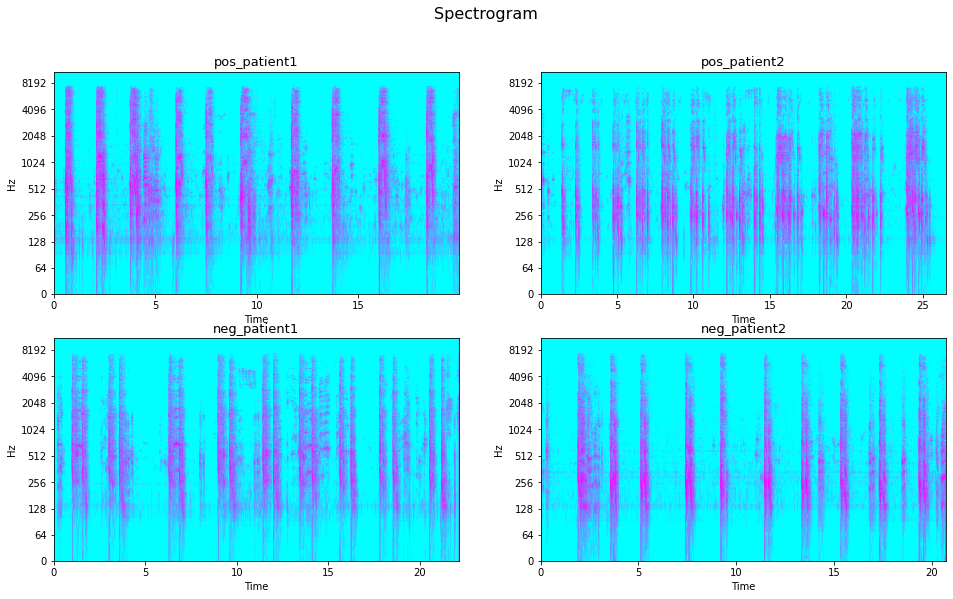

In [ ]:
DB_pos0 = librosa.amplitude_to_db(D_pos0, ref = np.max)
DB_pos1 = librosa.amplitude_to_db(D_pos1, ref = np.max)
DB_neg1 = librosa.amplitude_to_db(D_neg0, ref = np.max)
DB_neg2 = librosa.amplitude_to_db(D_neg1, ref = np.max)

# === PLOT ===
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle('Spectrogram', fontsize=16)
#fig.delaxes(ax[1, 2])

librosa.display.specshow(DB_pos0, sr = sr_pos0, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[0, 0])
librosa.display.specshow(DB_pos1, sr = sr_pos1, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[0, 1])
librosa.display.specshow(DB_neg1, sr = sr_neg1, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[1, 0])
librosa.display.specshow(DB_neg2, sr = sr_neg2, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[1, 1])


for i, name in zip(range(0, 2*2), covid_sample):
    x = i // 2
    y = i % 2
    ax[x, y].set_title(name, fontsize=13) 

#4. Mel Spectrogram 🎷
📌Note: The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

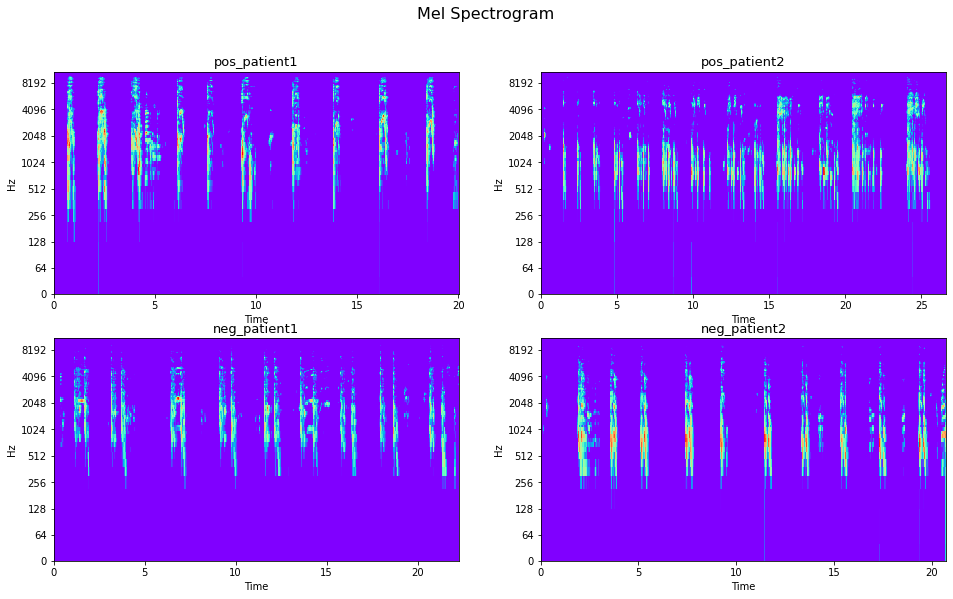

In [ ]:
S_pos0 = librosa.feature.melspectrogram(pos_0, sr=sr_pos0)
S_DB_pos0 = librosa.amplitude_to_db(S_pos0, ref=np.max)

S_pos1 = librosa.feature.melspectrogram(pos_1, sr=sr_pos1)
S_DB_pos1 = librosa.amplitude_to_db(S_pos1, ref=np.max)

S_neg1 = librosa.feature.melspectrogram(neg_1, sr=sr_neg1)
S_DB_neg1 = librosa.amplitude_to_db(S_neg1, ref=np.max)

S_neg2 = librosa.feature.melspectrogram(neg_2, sr=sr_neg2)
S_DB_neg2 = librosa.amplitude_to_db(S_neg2, ref=np.max)


# === PLOT ====
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle('Mel Spectrogram', fontsize=16)
#fig.delaxes(ax[1, 2])

librosa.display.specshow(S_DB_pos0, sr = sr_pos0, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[0, 0])
librosa.display.specshow(S_DB_pos1, sr = sr_pos1, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[0, 1])
librosa.display.specshow(S_DB_neg1, sr = sr_neg1, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[1, 0])
librosa.display.specshow(S_DB_neg2, sr = sr_neg2, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[1, 1])

for i, name in zip(range(0, 2*2), covid_sample):
    x = i // 2
    y = i % 2
    ax[x, y].set_title(name, fontsize=13)


#5. Zero Crossing Rate 🚷
📌Note: the rate at which the signal changes from positive to negative or back.

In [ ]:
# Total zero_crossings in our 1 song
zero_pos0 = librosa.zero_crossings(audio_pos0, pad=False)
zero_pos1 = librosa.zero_crossings(audio_pos1, pad=False)
zero_neg1 = librosa.zero_crossings(audio_neg1, pad=False)
zero_neg2 = librosa.zero_crossings(audio_neg2, pad=False)


zero_covid_list = [zero_pos0, zero_pos1, zero_neg1, zero_neg2]

for patient, name in zip(zero_covid_list, covid_sample):
    print("{} change rate is {:,}".format(name, sum(patient)))

pos_patient1 change rate is 52,346
pos_patient2 change rate is 85,957
neg_patient1 change rate is 50,967
neg_patient2 change rate is 44,574


#6. Harmonics and Perceptrual 🎹
📌Note:

Harmonics are characteristichs that represent the sound color
Perceptrual shock wave represents the sound rhythm and emotion

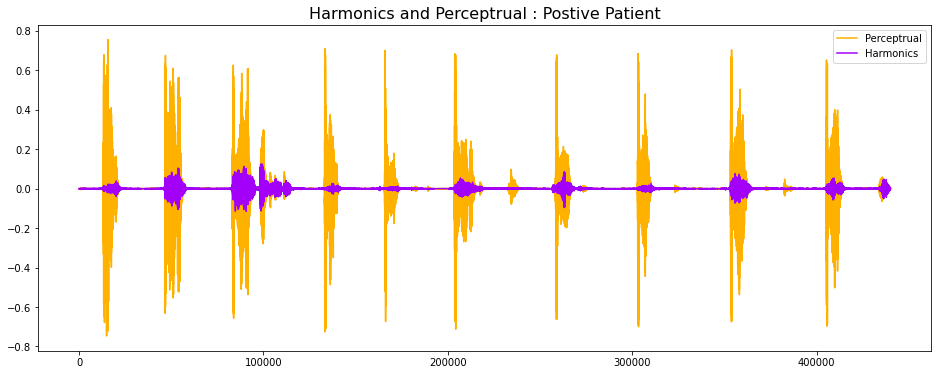

In [ ]:
y_harm_pos0, y_perc_pos0 = librosa.effects.hpss(audio_pos0)

plt.figure(figsize = (16, 6))
plt.plot(y_perc_pos0, color = '#FFB100')
plt.plot(y_harm_pos0, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual : Postive Patient", fontsize=16);

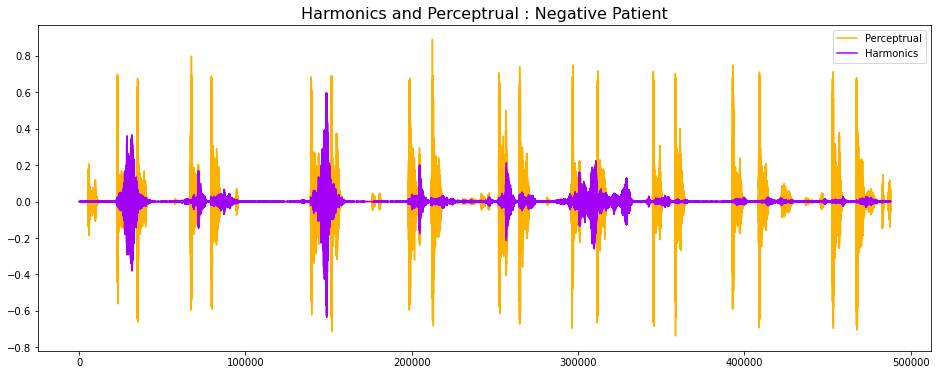

In [ ]:
y_harm_neg1, y_perc_neg1 = librosa.effects.hpss(audio_neg1)

plt.figure(figsize = (16, 6))
plt.plot(y_perc_neg1, color = '#FFB100')
plt.plot(y_harm_neg1, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual : Negative Patient", fontsize=16);

#7. Spectral Centroid 🎯
📌Note: Indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [10]:
spectral_centroid_pos_1 = librosa.feature.spectral_centroid(audio_pos1, sr=sr_pos1)[0]

# Shape is a vector
print('Centroids:', spectral_centroid_pos_1, '\n')
print('Shape of Spectral Centroids:', spectral_centroid_pos_1.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroid_pos_1))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1787.11555021 1739.48103078 1653.20446692 ... 2330.73772128 2651.40379176
 3219.9533289 ] 

Shape of Spectral Centroids: (1143,) 

frames: range(0, 1143) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.64707483e+01
 2.64939683e+01 2.65171882e+01]


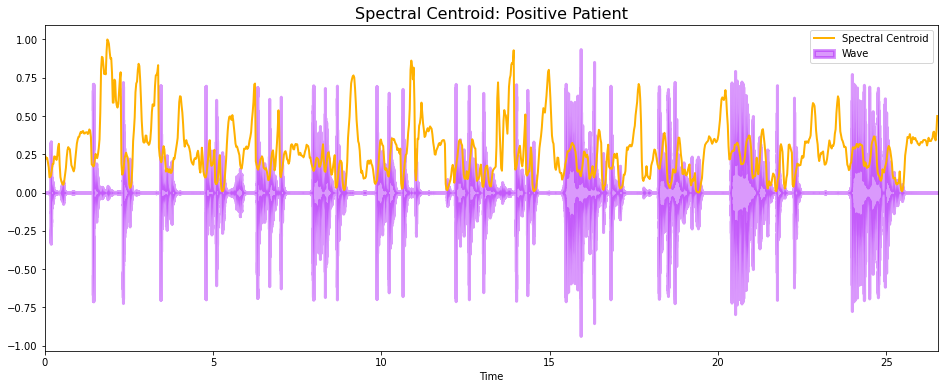

In [12]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_pos1, sr=sr_pos1, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroid_pos_1), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: Positive Patient", fontsize=16);

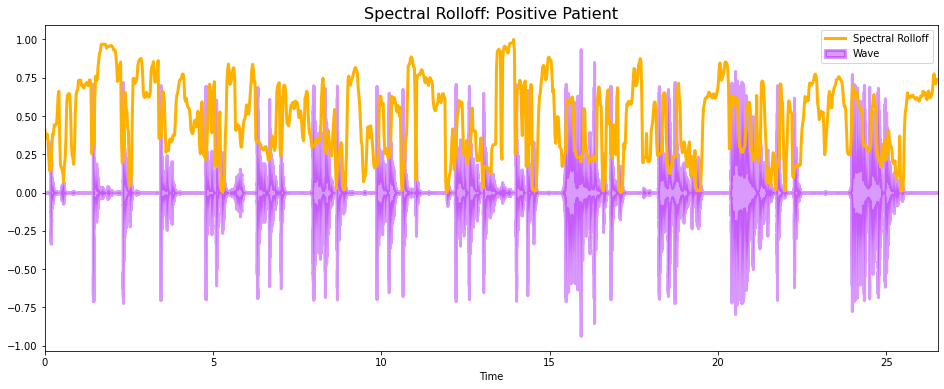

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_pos1, sr=sr_pos1)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_pos1, sr=sr_pos1, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: Positive Patient", fontsize=16);